In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import math

In [3]:
data=pd.read_csv("C:\\Users\\q\\Downloads\\CarPrice_Assignment.csv")

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.tail()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
data.shape


(205, 26)

In [7]:
data.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
data.rename(columns={'car_ID':'araba_kimliği',
                                   'symboling':'simgesi',
                                   'CarName':'araba_Adı',
                                   'fueltype':'yakıt_tipi',
                                   'aspiration':'aspirasyon',
                                   'doornumber':'kapı_numarası', 
                                   'carbody':'araç_gövdesi', 
                                   'drivewheel':'tahrik_tekerliği',
                                   'enginelocation':'motor_konumu',
                                   'wheelbase':'dingil_açıklığı',
                                   'carlength':'araba_uzunluğu', 
                                   'carwidth':'araba_genişliği', 
                                   'carheight':'araba_yüksekliği', 
                                   'curbweight':'frenleme',
                                   'enginetype':'motor_tahmini',
                                   'cylindernumber':'silindir_numarası', 
                                   'enginesize':'motor_boyutu', 
                                   'fuelsystem':'yakıt_sistemi',
                                   'boreratio':'Boreratio',
                                   'stroke':'felç',
                                   'compressionratio':'sıkıştırma_oranı', 
                                   'horsepower':'beygir_gücü',
                                   'peakrpm':'EnYüksek_devir',
                                   'citympg':'Şehir_içi',
                                   'highwaympg':'otoyol',
                                   'price':'Fiyat'}, inplace=True)

In [9]:
data.head()


,araba_kimliği,simgesi,araba_Adı,yakıt_tipi,aspirasyon,kapı_numarası,araç_gövdesi,tahrik_tekerliği,motor_konumu,dingil_açıklığı,araba_uzunluğu,araba_genişliği,araba_yüksekliği,frenleme,motor_tahmini,silindir_numarası,motor_boyutu,yakıt_sistemi,Boreratio,felç,sıkıştırma_oranı,beygir_gücü,EnYüksek_devir,Şehir_içi,otoyol,Fiyat
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   araba_kimliği      205 non-null    int64  
 1   simgesi            205 non-null    int64  
 2   araba_Adı          205 non-null    object 
 3   yakıt_tipi         205 non-null    object 
 4   aspirasyon         205 non-null    object 
 5   kapı_numarası      205 non-null    object 
 6   araç_gövdesi       205 non-null    object 
 7   tahrik_tekerliği   205 non-null    object 
 8   motor_konumu       205 non-null    object 
 9   dingil_açıklığı    205 non-null    float64
 10  araba_uzunluğu     205 non-null    float64
 11  araba_genişliği    205 non-null    float64
 12  araba_yüksekliği   205 non-null    float64
 13  frenleme           205 non-null    int64  
 14  motor_tahmini      205 non-null    object 
 15  silindir_numarası  205 non-null    object 
 16  motor_boyutu       205 non

In [11]:
data.isnull().sum()


araba_kimliği        0
simgesi              0
araba_Adı            0
yakıt_tipi           0
aspirasyon           0
kapı_numarası        0
araç_gövdesi         0
tahrik_tekerliği     0
motor_konumu         0
dingil_açıklığı      0
araba_uzunluğu       0
araba_genişliği      0
araba_yüksekliği     0
frenleme             0
motor_tahmini        0
silindir_numarası    0
motor_boyutu         0
yakıt_sistemi        0
Boreratio            0
felç                 0
sıkıştırma_oranı     0
beygir_gücü          0
EnYüksek_devir       0
Şehir_içi            0
otoyol               0
Fiyat                0
dtype: int64

In [12]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
araba_kimliği,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
simgesi,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
dingil_açıklığı,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
araba_uzunluğu,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
araba_genişliği,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
araba_yüksekliği,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
frenleme,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
motor_boyutu,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
Boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
felç,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [13]:
data=data.drop(['araba_kimliği','simgesi'], axis=1)


In [14]:
corr=data.corr()
corr

,dingil_açıklığı,araba_uzunluğu,araba_genişliği,araba_yüksekliği,frenleme,motor_boyutu,Boreratio,felç,sıkıştırma_oranı,beygir_gücü,EnYüksek_devir,Şehir_içi,otoyol,Fiyat
dingil_açıklığı,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
araba_uzunluğu,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
araba_genişliği,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
araba_yüksekliği,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
frenleme,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
motor_boyutu,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
Boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
felç,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
sıkıştırma_oranı,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
beygir_gücü,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<AxesSubplot:>

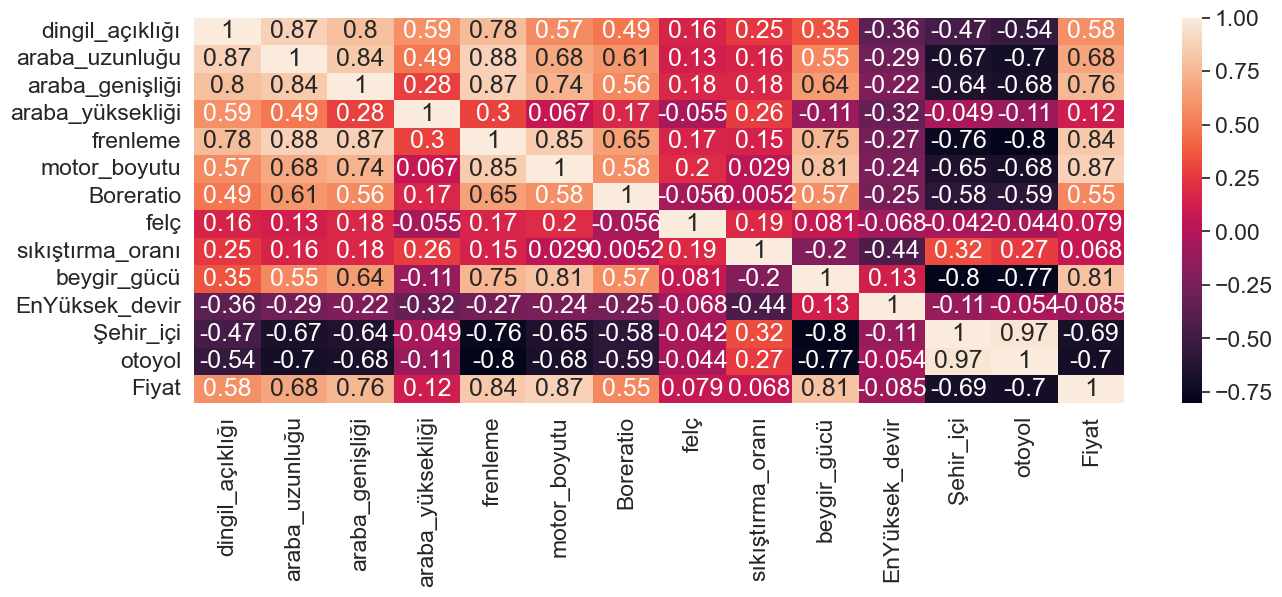

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='araba_uzunluğu', ylabel='dingil_açıklığı'>

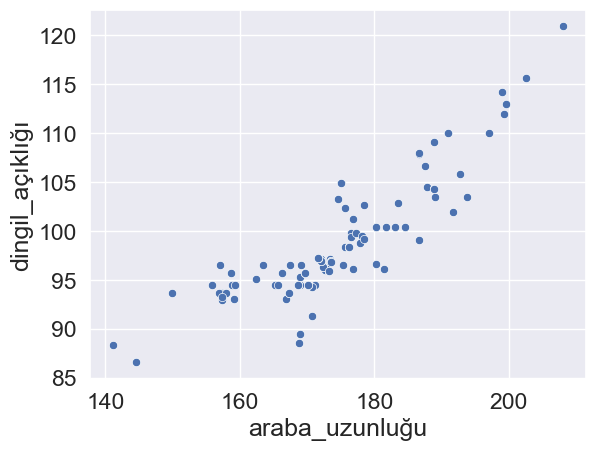

In [16]:
sns.scatterplot(x='araba_uzunluğu', y='dingil_açıklığı', data=data)

<AxesSubplot:xlabel='araba_genişliği', ylabel='dingil_açıklığı'>

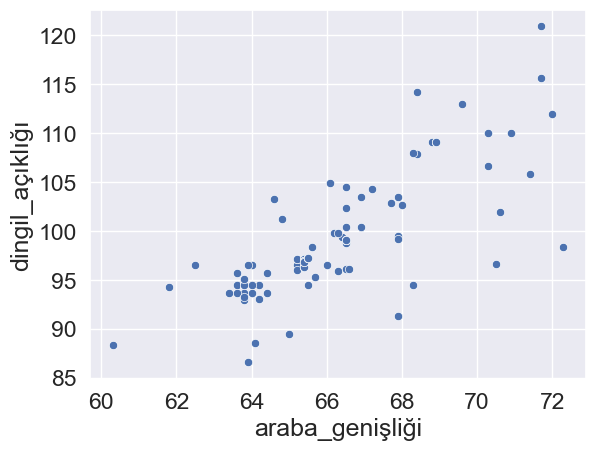

In [17]:
sns.scatterplot(x='araba_genişliği', y='dingil_açıklığı', data=data)


<AxesSubplot:xlabel='araba_uzunluğu', ylabel='araba_genişliği'>

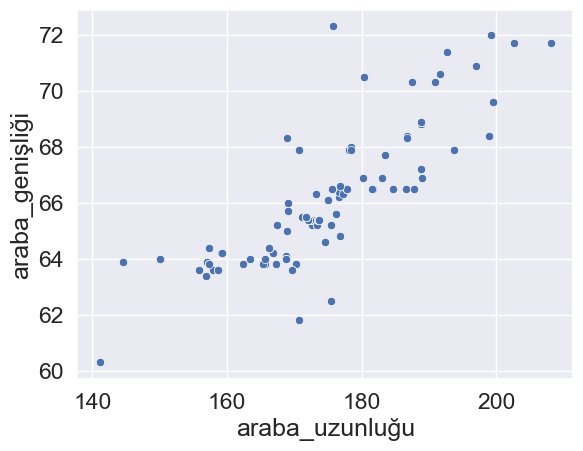

In [18]:
sns.scatterplot(x='araba_uzunluğu', y='araba_genişliği', data=data)

<AxesSubplot:xlabel='araba_uzunluğu', ylabel='araba_genişliği'>

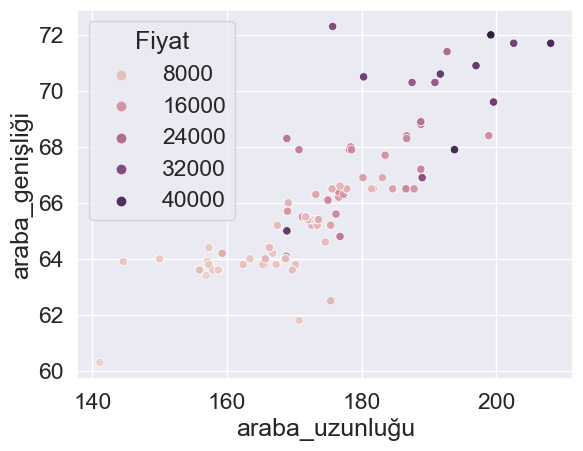

In [19]:
sns.scatterplot(x='araba_uzunluğu', y='araba_genişliği',hue='Fiyat' ,data=data)


<AxesSubplot:xlabel='Fiyat', ylabel='motor_boyutu'>

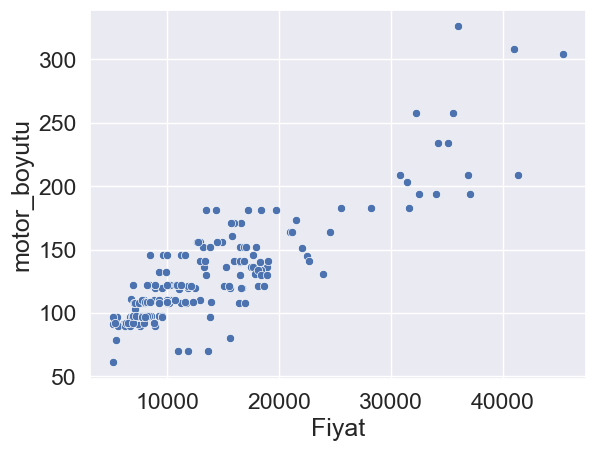

In [20]:
sns.scatterplot(x='Fiyat', y='motor_boyutu', data=data)


In [21]:
data['araba_Adı'].unique()


array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [22]:
data['araba_Adı'] = data['araba_Adı'].str.split(' ',expand=True)[0]


In [23]:
data['araba_Adı'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [24]:
data['araba_Adı'] = data['araba_Adı'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 
                                                                           'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [25]:
data['araba_Adı'].nunique()


22

In [26]:
data['araba_Adı'].value_counts()


toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: araba_Adı, dtype: int64

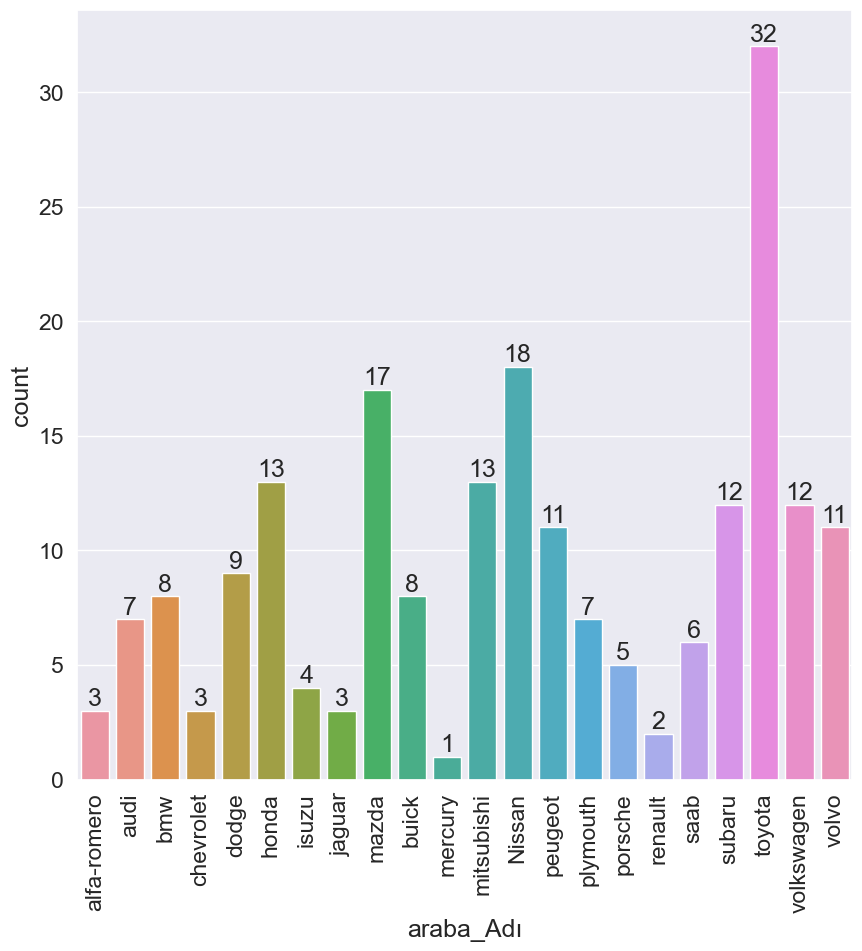

In [27]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x=data['araba_Adı']);
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90);

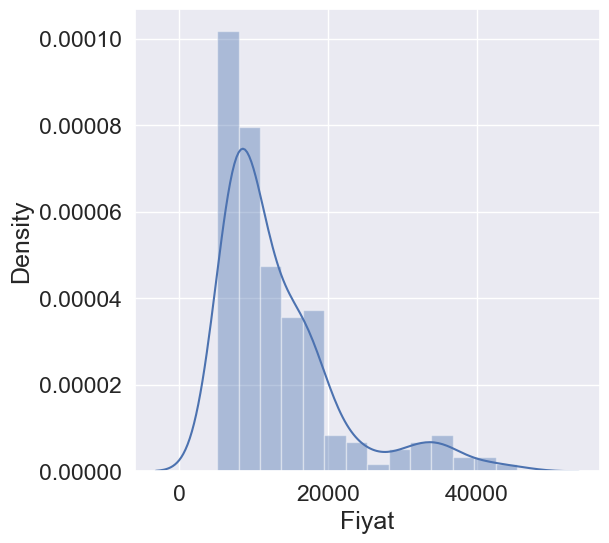

In [28]:
plt.figure(figsize=(6,6))
sns.distplot(data['Fiyat'], hist=True);

In [29]:
data['yakıt_tipi'].value_counts()


gas       185
diesel     20
Name: yakıt_tipi, dtype: int64

<AxesSubplot:xlabel='yakıt_tipi', ylabel='count'>

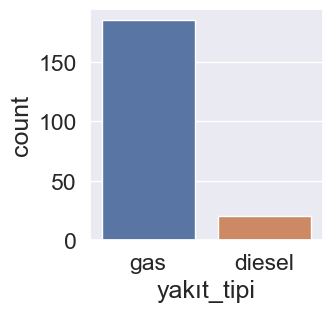

In [30]:
plt.figure(figsize=(3,3))
sns.countplot(x='yakıt_tipi', data=data)

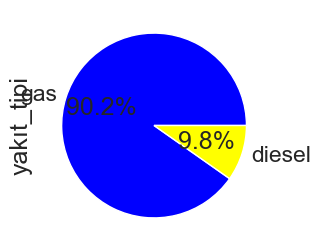

In [31]:
plt.figure(figsize=(3,3))
colors=['blue','yellow']
data.yakıt_tipi.value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.show()

In [32]:
data['kapı_numarası'].value_counts()


four    115
two      90
Name: kapı_numarası, dtype: int64

<AxesSubplot:xlabel='kapı_numarası', ylabel='count'>

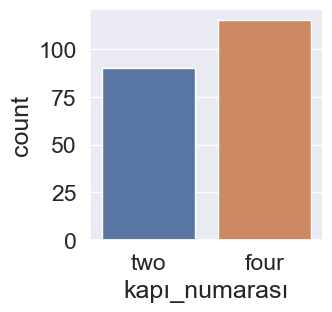

In [33]:
plt.figure(figsize=(3,3))
sns.countplot(x='kapı_numarası', data=data)

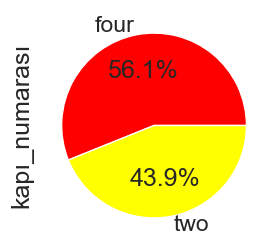

In [34]:
plt.figure(figsize=(3,3))
colors=['red','yellow']
data.kapı_numarası.value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.show()


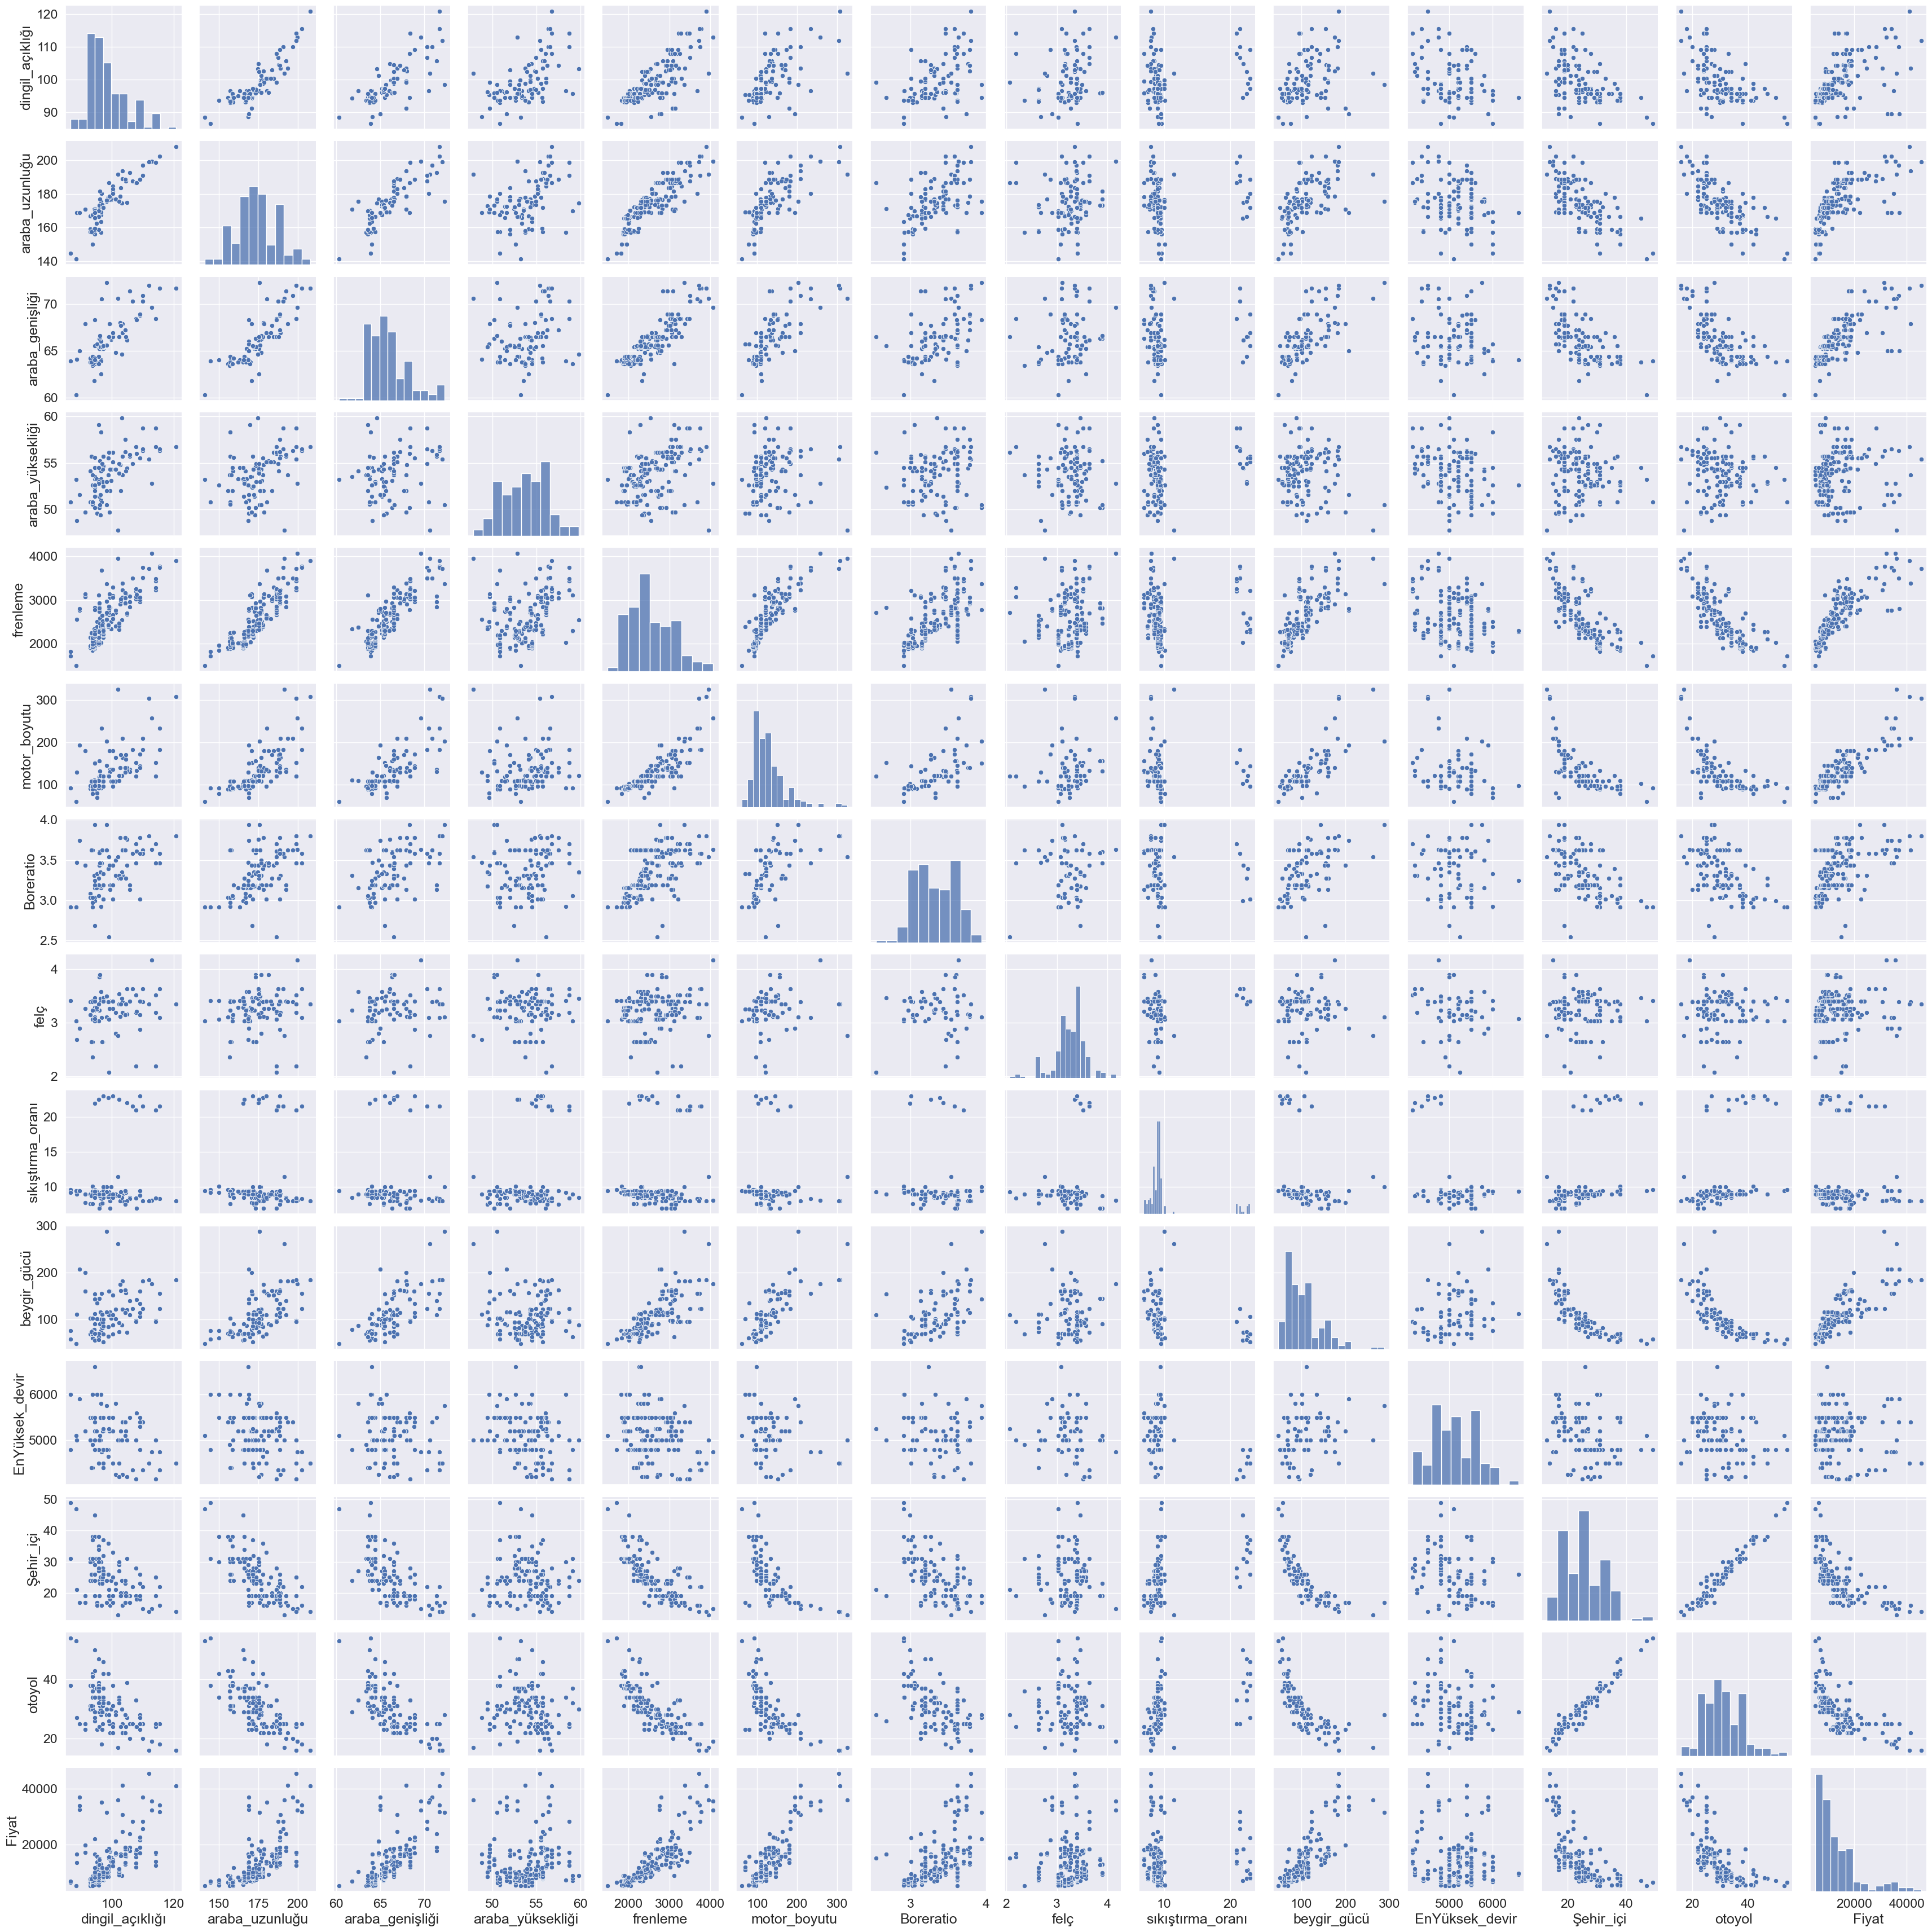

In [35]:
sns.pairplot(data)


<AxesSubplot:xlabel='beygir_gücü', ylabel='count'>

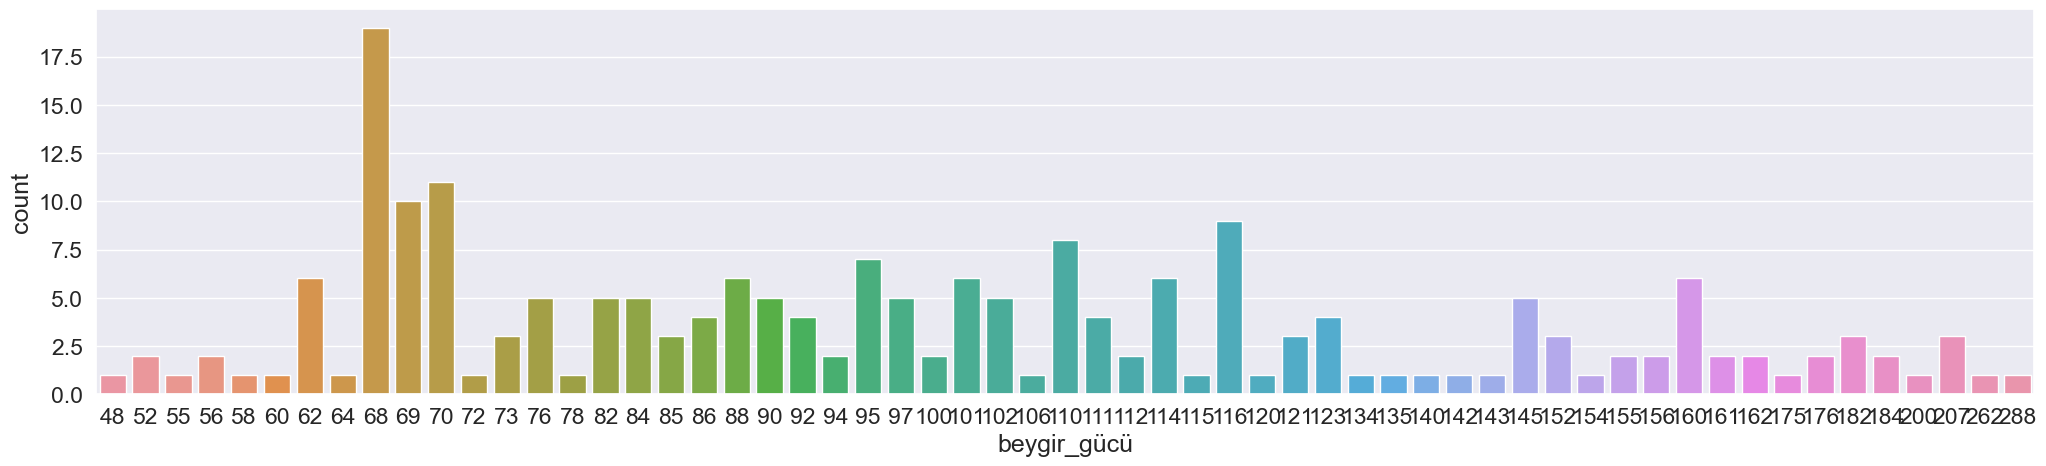

In [36]:
plt.figure(figsize=(25,5))
sns.countplot(x='beygir_gücü', data=data)

<AxesSubplot:xlabel='EnYüksek_devir', ylabel='count'>

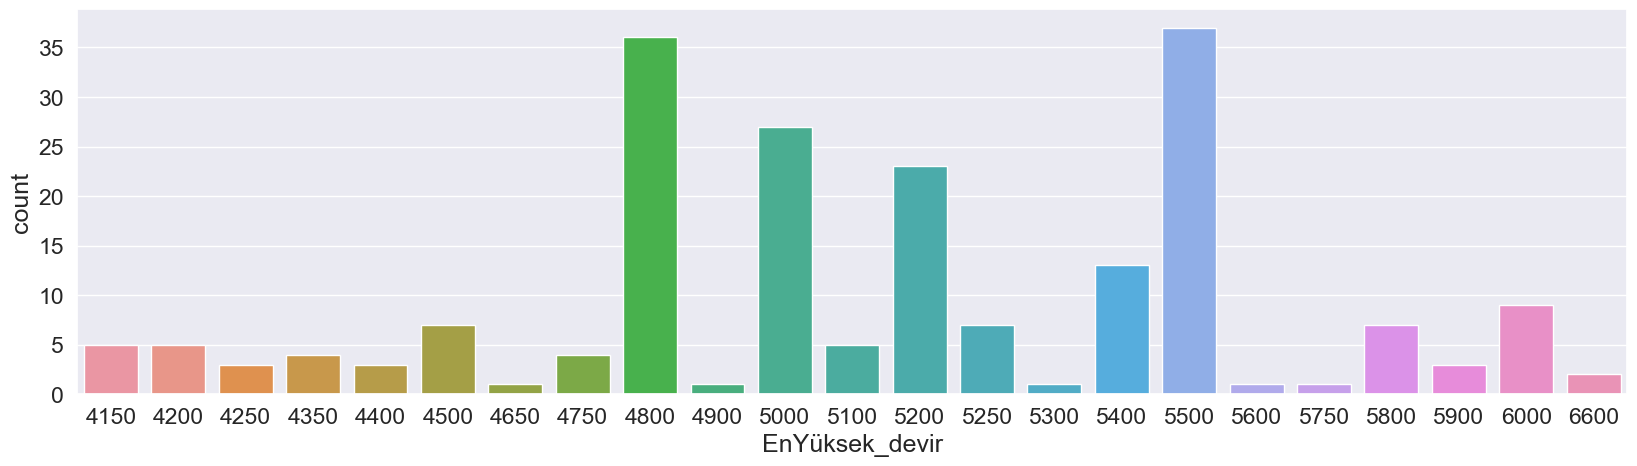

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(x='EnYüksek_devir', data=data)

In [38]:
label_encoder=preprocessing.LabelEncoder()


In [39]:
data['yakıt_tipi']= label_encoder.fit_transform (data['yakıt_tipi'])
data['kapı_numarası']= label_encoder.fit_transform (data['kapı_numarası'])
data['aspirasyon']= label_encoder.fit_transform (data['aspirasyon'])
data['motor_konumu']= label_encoder.fit_transform (data['motor_konumu'])
data['tahrik_tekerliği']= label_encoder.fit_transform (data['tahrik_tekerliği'])

In [40]:
data['araba_Adı'] = pd.Categorical(data['araba_Adı'])
dfDummiess = pd.get_dummies(data['araba_Adı'], prefix = 'araba_Adı')
dfDummiess

,araba_Adı_Nissan,araba_Adı_alfa-romero,araba_Adı_audi,araba_Adı_bmw,araba_Adı_buick,araba_Adı_chevrolet,araba_Adı_dodge,araba_Adı_honda,araba_Adı_isuzu,araba_Adı_jaguar,araba_Adı_mazda,araba_Adı_mercury,araba_Adı_mitsubishi,araba_Adı_peugeot,araba_Adı_plymouth,araba_Adı_porsche,araba_Adı_renault,araba_Adı_saab,araba_Adı_subaru,araba_Adı_toyota,araba_Adı_volkswagen,araba_Adı_volvo
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
data = pd.concat([data,dfDummiess], axis=1)
data = data.drop(["araba_Adı"], axis = 1)


In [42]:
data['motor_tahmini'] = pd.Categorical(data['motor_tahmini'])
dfDummiess = pd.get_dummies(data['motor_tahmini'], prefix = 'motor_tahmini')
dfDummiess

,motor_tahmini_dohc,motor_tahmini_dohcv,motor_tahmini_l,motor_tahmini_ohc,motor_tahmini_ohcf,motor_tahmini_ohcv,motor_tahmini_rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0
5,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0
7,0,0,0,1,0,0,0
8,0,0,0,1,0,0,0
9,0,0,0,1,0,0,0


In [43]:
data = pd.concat([data,dfDummiess], axis=1)
data = data.drop(["motor_tahmini"], axis = 1)

In [44]:
data['silindir_numarası'] = pd.Categorical(data['silindir_numarası'])
dfDummiess = pd.get_dummies(data['silindir_numarası'], prefix = 'silindir_numarası')
dfDummiess

,silindir_numarası_eight,silindir_numarası_five,silindir_numarası_four,silindir_numarası_six,silindir_numarası_three,silindir_numarası_twelve,silindir_numarası_two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0
7,0,1,0,0,0,0,0
8,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0


In [45]:
data = pd.concat([data,dfDummiess], axis=1)
data = data.drop(["silindir_numarası"], axis = 1)

In [46]:
data['araç_gövdesi'] = pd.Categorical(data['araç_gövdesi'])
dfDummiess = pd.get_dummies(data['araç_gövdesi'], prefix = 'araç_gövdesi')
dfDummiess

,araç_gövdesi_convertible,araç_gövdesi_hardtop,araç_gövdesi_hatchback,araç_gövdesi_sedan,araç_gövdesi_wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,0,1
8,0,0,0,1,0
9,0,0,1,0,0


In [47]:
data = pd.concat([data,dfDummiess], axis=1)
data = data.drop(["araç_gövdesi"], axis = 1)

In [48]:
data['yakıt_sistemi'] = pd.Categorical(data['yakıt_sistemi'])
dfDummiess = pd.get_dummies(data['yakıt_sistemi'], prefix = 'yakıt_sistemi')
dfDummiess

,yakıt_sistemi_1bbl,yakıt_sistemi_2bbl,yakıt_sistemi_4bbl,yakıt_sistemi_idi,yakıt_sistemi_mfi,yakıt_sistemi_mpfi,yakıt_sistemi_spdi,yakıt_sistemi_spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0
7,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0
9,0,0,0,0,0,1,0,0


In [49]:
data = pd.concat([data,dfDummiess], axis=1)
data = data.drop(["yakıt_sistemi"], axis = 1)

In [50]:
data.head()


,yakıt_tipi,aspirasyon,kapı_numarası,tahrik_tekerliği,motor_konumu,dingil_açıklığı,araba_uzunluğu,araba_genişliği,araba_yüksekliği,frenleme,motor_boyutu,Boreratio,felç,sıkıştırma_oranı,beygir_gücü,EnYüksek_devir,Şehir_içi,otoyol,Fiyat,araba_Adı_Nissan,araba_Adı_alfa-romero,araba_Adı_audi,araba_Adı_bmw,araba_Adı_buick,araba_Adı_chevrolet,araba_Adı_dodge,araba_Adı_honda,araba_Adı_isuzu,araba_Adı_jaguar,araba_Adı_mazda,araba_Adı_mercury,araba_Adı_mitsubishi,araba_Adı_peugeot,araba_Adı_plymouth,araba_Adı_porsche,araba_Adı_renault,araba_Adı_saab,araba_Adı_subaru,araba_Adı_toyota,araba_Adı_volkswagen,araba_Adı_volvo,motor_tahmini_dohc,motor_tahmini_dohcv,motor_tahmini_l,motor_tahmini_ohc,motor_tahmini_ohcf,motor_tahmini_ohcv,motor_tahmini_rotor,silindir_numarası_eight,silindir_numarası_five,silindir_numarası_four,silindir_numarası_six,silindir_numarası_three,silindir_numarası_twelve,silindir_numarası_two,araç_gövdesi_convertible,araç_gövdesi_hardtop,araç_gövdesi_hatchback,araç_gövdesi_sedan,araç_gövdesi_wagon,yakıt_sistemi_1bbl,yakıt_sistemi_2bbl,yakıt_sistemi_4bbl,yakıt_sistemi_idi,yakıt_sistemi_mfi,yakıt_sistemi_mpfi,yakıt_sistemi_spdi,yakıt_sistemi_spfi
0,1,0,1,2,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,1,2,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [51]:
x=data.drop(['Fiyat'], axis=1)
y=data['Fiyat']

In [52]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2 , random_state=41)


In [53]:
from sklearn.ensemble import RandomForestRegressor


In [54]:
rf_reg=RandomForestRegressor(n_estimators=10,random_state=0)


In [55]:
model=rf_reg.fit(x_train, y_train)


In [56]:
y_pred = rf_reg.predict(x_test)


In [57]:
print("R2 score:", r2_score(y_test, y_pred))


R2 score: 0.9309330193367128


In [58]:
MAE = mean_absolute_error(y_test, y_pred)
print("Ortalama Mutlak Hata (Mean Absolute Error):", MAE)

Ortalama Mutlak Hata (Mean Absolute Error): 1279.3833414634148


In [59]:
MSE = mean_squared_error(y_test, y_pred)
print("Ortalama Kare Hata (Mean Squared Error):", MSE)

Ortalama Kare Hata (Mean Squared Error): 2653695.4859753414


In [60]:
RMSE = math.sqrt(MSE)
print("Kök Ortalama Kare Hata (Root Mean Square Error):", RMSE)

Kök Ortalama Kare Hata (Root Mean Square Error): 1629.0167236634932
